In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

upload dataset

In [3]:
data = pd.read_csv("teh.csv")
pd.set_option('display.max_rows',476)
data.head()

,Warna,Ukuran Partikel,Density,Bentuk Partikel,Grade
0,1,12,340,1,1
1,2,12,350,1,2
2,2,14,350,3,1
3,1,12,280,3,1
4,2,14,440,2,1


cek missing value

In [4]:
data.isnull().sum()

Warna              0
Ukuran Partikel    0
Density            0
Bentuk Partikel    0
Grade              0
dtype: int64

In [5]:
data.describe()

,Warna,Ukuran Partikel,Density,Bentuk Partikel,Grade
count,476.000000,476.000000,476.000000,476.000000,476.000000
mean,2.058824,22.521008,327.823529,2.294118,1.764706
std,0.725988,12.535994,64.847727,1.177708,0.645057
min,1.000000,10.000000,190.000000,1.000000,1.000000
25%,2.000000,14.000000,280.000000,1.000000,1.000000
50%,2.000000,18.000000,335.000000,2.000000,2.000000
75%,3.000000,30.000000,365.000000,3.000000,2.000000
max,3.000000,60.000000,482.000000,4.000000,3.000000


Normalisasi Data dengan menggunakan min-max

In [7]:
df_norm = data[['Warna','Ukuran Partikel','Density','Bentuk Partikel']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#print(df_norm)
pd.set_option('display.max_rows',476)
df_norm.sample(n=5)

,Warna,Ukuran Partikel,Density,Bentuk Partikel
272,0.0,0.08,0.582192,0.000000
393,0.5,0.12,0.565068,0.666667
122,0.0,0.08,0.308219,0.666667
364,0.5,0.04,0.291096,0.000000
256,0.5,0.08,0.582192,0.000000


In [8]:
df_norm.describe()

,Warna,Ukuran Partikel,Density,Bentuk Partikel
count,476.000000,476.00000,476.000000,476.000000
mean,0.529412,0.25042,0.471998,0.431373
std,0.362994,0.25072,0.222081,0.392569
min,0.000000,0.00000,0.000000,0.000000
25%,0.500000,0.08000,0.308219,0.000000
50%,0.500000,0.16000,0.496575,0.333333
75%,1.000000,0.40000,0.599315,0.666667
max,1.000000,1.00000,1.000000,1.000000


In [10]:
target = data[['Grade']].replace([1,2,3],[0,1,2])
pd.set_option('display.max_rows',476) 
#print(target)
target.sample(n=5)

,Grade
357,0
77,1
411,0
6,0
245,1


In [11]:
df = pd.concat([df_norm, target], axis=1)
pd.set_option('display.max_rows',476) 
#print(df)
df.sample(n=5)

,Warna,Ukuran Partikel,Density,Bentuk Partikel,Grade
228,0.5,0.08,0.239726,0.000000,1
97,0.5,0.28,0.034247,1.000000,1
86,0.5,0.00,0.582192,0.000000,1
58,0.5,0.04,0.256849,0.000000,1
106,0.5,0.12,0.924658,0.333333,0


split data testing dan data training

In [14]:
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
pd.set_option('display.max_rows',476) 
#print(df)
df.sample(n=5)


,Warna,Ukuran Partikel,Density,Bentuk Partikel,Grade,train
107,0.0,0.16,0.428082,0.000000,0,True
199,0.5,0.28,0.462329,1.000000,1,True
445,0.0,0.08,0.428082,0.666667,0,True
54,0.0,0.08,0.308219,0.666667,0,True
22,0.0,0.16,0.410959,0.000000,0,False


In [16]:
train = df[df.train == 1]
train = train.drop('train', axis=1)

pd.set_option('display.max_rows',475)

#print(train)
print("jumlah data yang di latih sebesar:",len(train.index))
train.sample(n=5)

jumlah data yang di latih sebesar: 433


,Warna,Ukuran Partikel,Density,Bentuk Partikel,Grade
156,0.0,0.08,0.325342,0.666667,0
347,0.5,0.04,0.291096,0.000000,1
242,0.5,0.08,0.856164,0.333333,0
312,0.0,0.28,0.273973,1.000000,0
358,0.5,0.08,0.582192,0.000000,1


In [17]:
test = df[df.train == 0]
test = test.drop('train', axis=1)

#print(test)
print("Jumlah data test yang testing sebesar:",len(test.index))
test.sample(n=5)

Jumlah data test yang testing sebesar: 43


,Warna,Ukuran Partikel,Density,Bentuk Partikel,Grade
13,0.5,0.40,0.359589,0.0,1
472,0.5,0.40,0.359589,0.0,1
182,0.5,0.40,0.051370,1.0,1
384,1.0,0.28,0.325342,1.0,1
277,0.0,0.16,0.376712,0.0,0


In [18]:
X = train.values[:,:4]
X[:5]

array([[0.        , 0.04      , 0.51369863, 0.        ],
       [0.5       , 0.04      , 0.54794521, 0.        ],
       [0.5       , 0.08      , 0.54794521, 0.66666667],
       [0.        , 0.04      , 0.30821918, 0.66666667],
       [0.        , 0.16      , 0.44520548, 0.        ]])

In [19]:
targets = [[1,0,0],[0,1,0],[0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,4:5]])
y[:5]


array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

# Jaringan Syaraf Tiruan

Model yang di bentuk memiliki 3 layer, yaitu :

1. Input Layer
   Input layer terdiri dari : Warna, Ukuran Partikel, Density, Bantuk Partikel
2. Output Layer
   Output Layer terdiri dari Grade 1,2,3 dimana akan di representasikan dengan : 
   -> [1,0,0] sebagai Grade 1
   -> [0,1,0] sebagai Grade 2
   -> [0,0,1] sebagai Grade 3

In [20]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 =np.random.uniform(low= 0.1, high=0.99,size=(num_inputs,hidden_layer_neurons))
bias1 = 2*np.random.random(hidden_layer_neurons) - 1
print(w1)
print(bias1)

[[0.96065656 0.5870367  0.96568908 0.73618623 0.72097865]
 [0.29231965 0.96888426 0.10554493 0.3251543  0.48696446]
 [0.7936508  0.27593972 0.86806398 0.9752266  0.24581959]
 [0.63162721 0.10799763 0.44404844 0.13930245 0.95142114]]
[-0.12770671  0.89795461  0.57261197  0.7325786  -0.65366916]


In [21]:
num_outputs = len(y[0])
w2 = np.random.uniform(low=0.1, high=0.99, size=(hidden_layer_neurons,num_outputs))
bias2 = 2*np.random.random(num_outputs) - 1
print(w2)
print(bias2)

[[0.16670424 0.63466102 0.24949524]
 [0.75270835 0.46351504 0.56983885]
 [0.93443871 0.56430955 0.19629211]
 [0.24081883 0.58523036 0.56671963]
 [0.66747312 0.45733094 0.67832655]]
[-0.20619999  0.24783223  0.53480993]


# Arsitektur Jaringan Syaraf Tiruan

In [22]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

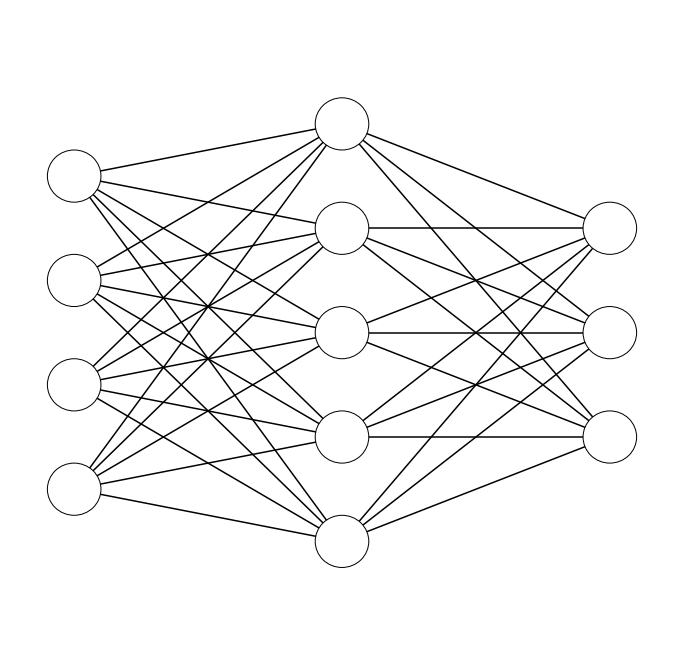

In [23]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 3])

Latih data training

In [26]:
from sklearn.metrics import mean_squared_error


learning_rate = 0.02 
error = []
for epoch in range(1000):
   
    
    l1 = 1/(1 + np.exp(-(np.dot(X, w1)+bias1)))
    #if epoch % 1==0:
     #   print('l1',l1)
    
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2)+bias2)))
    
    #if epoch % 1==0:
     #   print('l2',l2)
    
    er  = mean_squared_error(y, l2)
    
    #print('epoch:',epoch,' error:',er)
    error.append(er)
    #print('target',y)
   
    l2_delta = (y - l2)*(l2 * (1-l2))
    
    bias2_delta=np.sum(l2_delta, axis=0)
    #if epoch % 1==0:
     #   print('l2_delta',l2_delta)
      #  print('l2 delta shape',l2_delta.shape)
       
        
    w2 += l1.T.dot(l2_delta) * learning_rate
    
    bias2+=bias2_delta * learning_rate
    
    #if epoch % 1 ==0:
      #print('w2',w2)
        #print('bias 2',bias2)
    
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    
    bias1_delta=np.sum(l1_delta, axis=0)
    
   # if epoch % 1==0:
    #    print('l1_delta',l1_delta)
    
    w1 += X.T.dot(l1_delta) * learning_rate
    
    bias1+=bias1_delta * learning_rate
    
    #if epoch % 1 ==0:
        #print('w1',w1)
        #print('bias 1',bias1)


print('Error:', er)
akurasi=(1-er)*100
#print('accuracy',akurasi)

Error: 0.00484635435883809


Plot nilai error

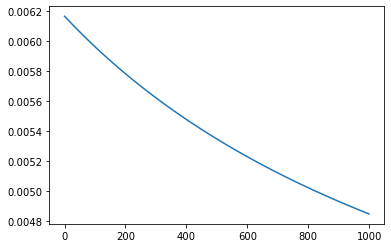

In [27]:
plt.plot(error)

Testing data testing

In [28]:
X = test.values[:,:4]
y = np.array([targets[int(x)] for x in test.values[:,4:5]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1)+bias1)))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2)+bias2)))

er  = mean_squared_error(y, l2)
print('error :',er)
np.round(l2,3)

error : 0.014697741807462847


array([[0.941, 0.02 , 0.005],
       [0.   , 1.   , 0.   ],
       [0.99 , 0.039, 0.   ],
       [0.001, 0.999, 0.002],
       [0.001, 0.999, 0.001],
       [0.038, 0.978, 0.   ],
       [0.   , 0.977, 0.028],
       [0.001, 0.999, 0.001],
       [0.001, 0.999, 0.001],
       [0.001, 0.965, 0.04 ],
       [0.   , 0.066, 0.927],
       [0.   , 0.066, 0.927],
       [0.986, 0.043, 0.001],
       [0.927, 0.012, 0.01 ],
       [0.001, 0.999, 0.   ],
       [1.   , 0.002, 0.   ],
       [0.999, 0.003, 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.97 , 0.037],
       [0.977, 0.083, 0.   ],
       [0.   , 0.999, 0.001],
       [0.005, 0.996, 0.   ],
       [0.   , 0.19 , 0.801],
       [0.98 , 0.06 , 0.001],
       [0.001, 0.999, 0.001],
       [0.772, 0.046, 0.01 ],
       [0.977, 0.083, 0.   ],
       [0.955, 0.005, 0.016],
       [0.999, 0.003, 0.   ],
       [0.   , 0.098, 0.893],
       [0.854, 0.018, 0.015],
       [1.   , 0.002, 0.   ],
       [0.001, 0.998, 0.002],
       [0.

In [29]:
#print(y)
yp = np.argmax(l2, axis=1) 

res = yp == np.argmax (y, axis=1) 
#print(res)
correct = np.sum(res)/len(res)

testres = test[['Grade']].replace([0,1,2], [1,2,3])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2], [1,2,3])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')


     Grade  Prediction
4        1           1
13       2           2
22       1           1
27       2           2
29       2           2
79       2           2
84       2           2
86       2           2
103      2           2
111      2           2
134      3           3
151      3           3
155      1           1
157      1           1
182      2           2
190      1           1
204      1           1
211      2           2
220      2           2
226      1           1
237      2           2
250      2           2
253      3           3
257      1           1
273      2           2
276      1           1
277      1           1
293      1           1
306      1           1
321      3           3
327      1           1
343      1           1
367      2           2
384      2           2
388      3           3
410      1           1
416      2           2
417      2           2
423      3           3
433      2           2
437      2           1
438      2           2
472      2 

confussion matrix

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
pred_classes = np.argmax(l2,axis=1)
y_test_classes = np.argmax(y,axis=1)
print(classification_report(y_test_classes,pred_classes),"\n\n")
print(confusion_matrix(y_test_classes,pred_classes))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.95      0.98        22
           2       1.00      1.00      1.00         6

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43
 


[[15  0  0]
 [ 1 21  0]
 [ 0  0  6]]
